/tmp/ipykernel_2659212/3110504820.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['Model'], rotation=45, ha='right')
/tmp/ipykernel_2659212/3110504820.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df['Model'], rotation=45, ha='right')


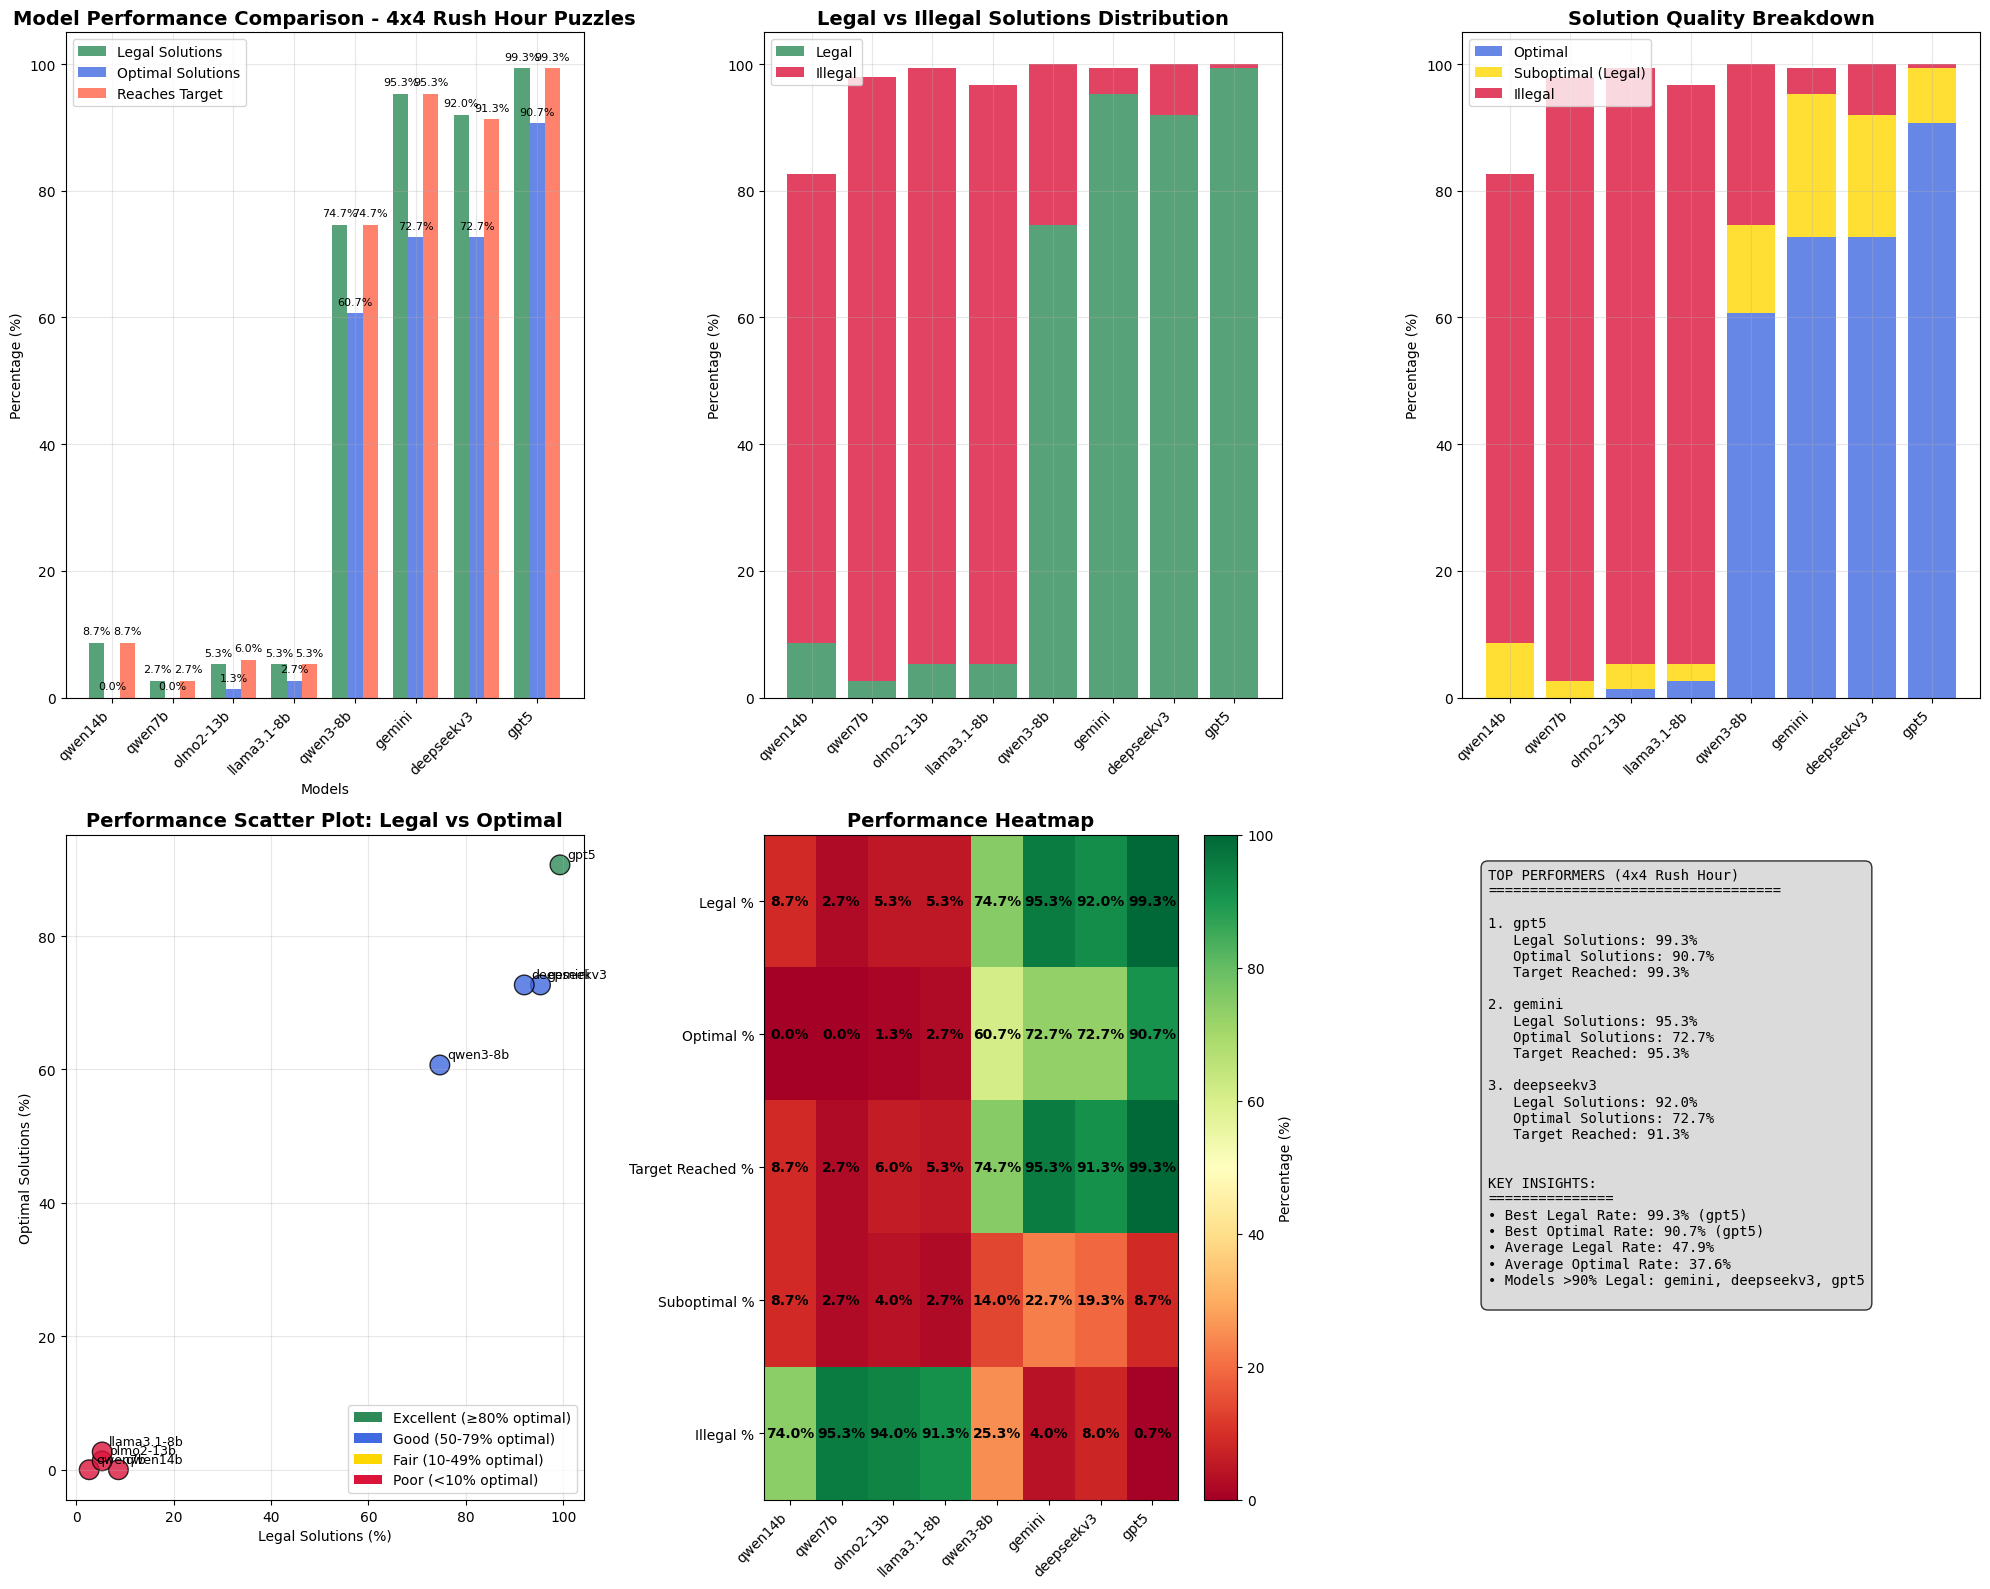

RUSH HOUR 4x4 BENCHMARK RESULTS
Total Models Analyzed: 8
Average Legal Solution Rate: 47.9%
Average Optimal Solution Rate: 37.6%
Standard Deviation (Optimal): 39.9%

PERFORMANCE RANKINGS:
--------------------
 1. gpt5            -  90.7% optimal,  99.3% legal
 2. gemini          -  72.7% optimal,  95.3% legal
 3. deepseekv3      -  72.7% optimal,  92.0% legal
 4. qwen3-8b        -  60.7% optimal,  74.7% legal
 5. llama3.1-8b     -   2.7% optimal,   5.3% legal
 6. olmo2-13b       -   1.3% optimal,   5.3% legal
 7. qwen14b         -   0.0% optimal,   8.7% legal
 8. qwen7b          -   0.0% optimal,   2.7% legal


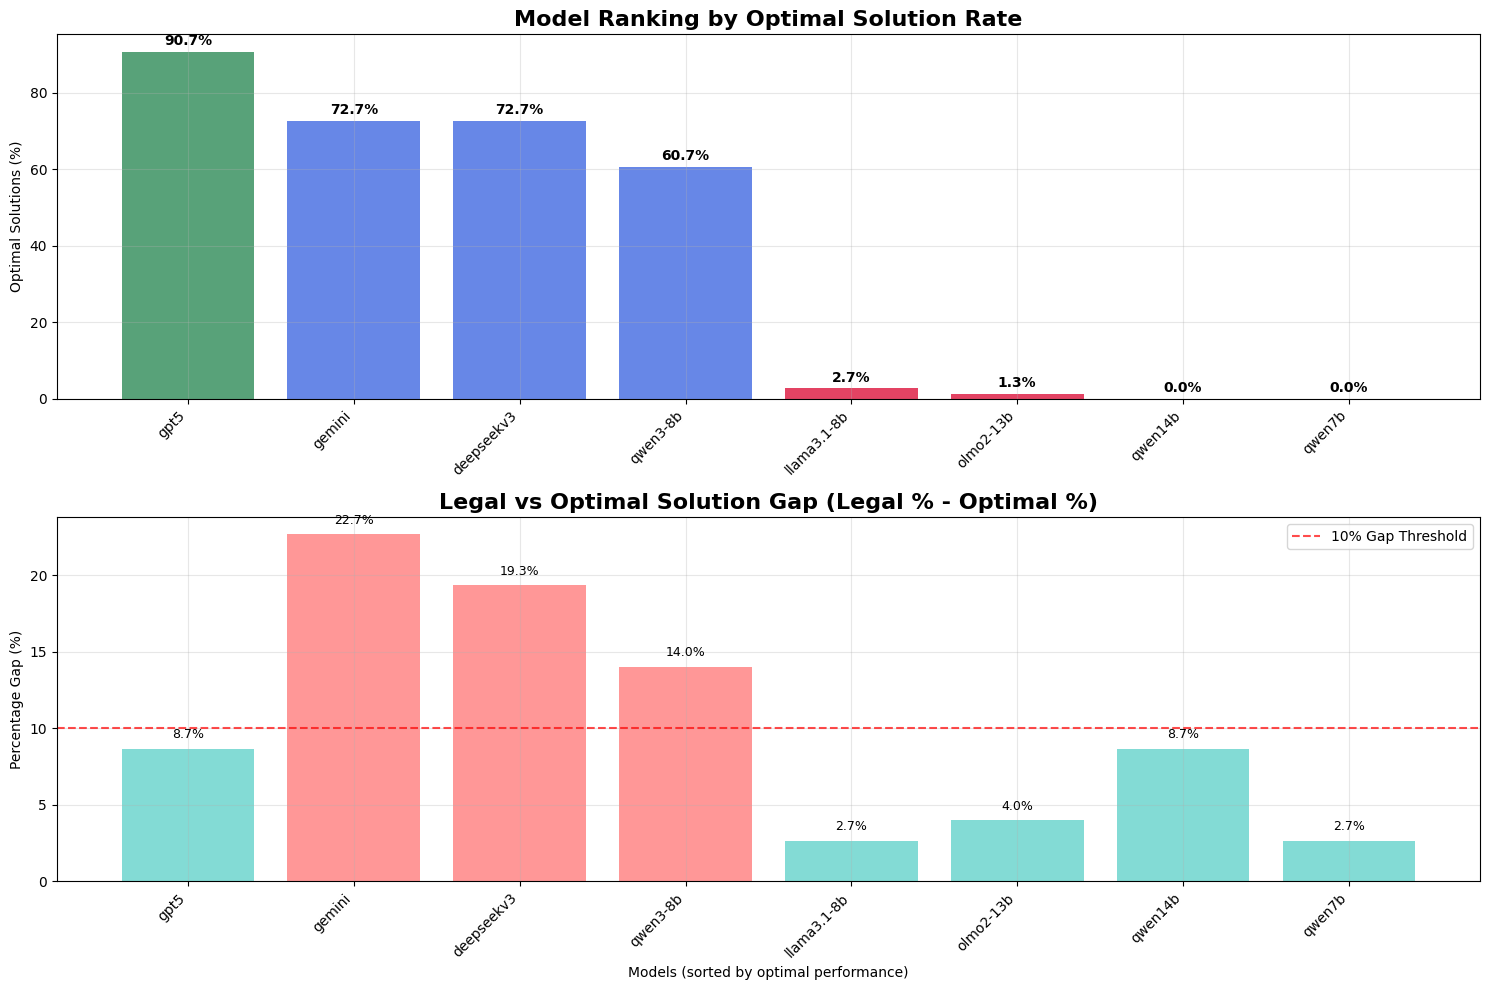

Visualization complete!


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Load the results file
results_file = "rush_hour_analysis_4x4_results.json"  # Change to your file path
with open(results_file, 'r') as f:
    data = json.load(f)

# Extract model performance data with new categories
models = []
legal_accomplishes_target_percentages = []
legal_optimal_percentages = []
illegal_percentages = []
legal_no_target_percentages = []
legal_suboptimal_percentages = []

for model_name, model_data in data['models'].items():
    models.append(model_name)
    legal_accomplishes_target_percentages.append(model_data.get('legal_accomplishes_target_percentage', 0))
    legal_optimal_percentages.append(model_data.get('legal_optimal_target_percentage', 0))
    illegal_percentages.append(model_data.get('illegal_percentage', 0))
    legal_no_target_percentages.append(model_data.get('legal_no_target_percentage', 0))
    legal_suboptimal_percentages.append(model_data.get('legal_suboptimal_percentage', 0))

# Create DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': models,
    'Legal_Accomplishes_Target': legal_accomplishes_target_percentages,
    'Legal_Optimal': legal_optimal_percentages,
    'Illegal_Moves': illegal_percentages,
    'Legal_No_Target': legal_no_target_percentages,
    'Legal_Suboptimal': legal_suboptimal_percentages
})

# Sort by optimal percentage for better visualization
df = df.sort_values('Legal_Optimal', ascending=True)

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))

# 1. Overall Performance Comparison (Bar Chart) - UPDATED
ax1 = plt.subplot(2, 2, 1)
x = np.arange(len(df))
width = 0.35

bars1 = ax1.bar(x - width/2, df['Legal_Accomplishes_Target'], width, 
                label='Legal & Accomplishes Target', alpha=0.8, color='#2E8B57')
bars2 = ax1.bar(x + width/2, df['Legal_Optimal'], width, 
                label='Legal & Optimal', alpha=0.8, color='#4169E1')

ax1.set_xlabel('Models')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Model Performance: Target Achievement vs Optimality', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# 2. Four-Category Breakdown (Stacked Bar Chart)
ax2 = plt.subplot(2, 2, 2)
bars_optimal = ax2.bar(df['Model'], df['Legal_Optimal'], 
                       label='Legal + Optimal', alpha=0.8, color='#4169E1')
bars_suboptimal = ax2.bar(df['Model'], df['Legal_Suboptimal'], 
                          bottom=df['Legal_Optimal'],
                          label='Legal + Suboptimal', alpha=0.8, color='#FFD700')
bars_no_target = ax2.bar(df['Model'], df['Legal_No_Target'], 
                         bottom=df['Legal_Optimal'] + df['Legal_Suboptimal'],
                         label='Legal but No Target', alpha=0.8, color='#FF8C00')
bars_illegal = ax2.bar(df['Model'], df['Illegal_Moves'], 
                       bottom=df['Legal_Optimal'] + df['Legal_Suboptimal'] + df['Legal_No_Target'],
                       label='Illegal Moves', alpha=0.8, color='#DC143C')

ax2.set_ylabel('Percentage (%)')
ax2.set_title('Complete Solution Category Breakdown', fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(df['Model'], rotation=45, ha='right')
ax2.set_ylim(0, 105)
ax2.grid(True, alpha=0.3)

# 3. Legal Solutions Breakdown
ax3 = plt.subplot(2, 2, 3)
bars_legal_target = ax3.bar(df['Model'], df['Legal_Accomplishes_Target'], 
                            label='Accomplishes Target', alpha=0.8, color='#2E8B57')
bars_legal_no_target = ax3.bar(df['Model'], df['Legal_No_Target'], 
                               bottom=df['Legal_Accomplishes_Target'],
                               label='Legal but No Target', alpha=0.8, color='#FF8C00')

ax3.set_ylabel('Percentage (%)')
ax3.set_title('Legal Moves: Target Achievement', fontsize=14, fontweight='bold')
ax3.legend()
ax3.set_xticklabels(df['Model'], rotation=45, ha='right')
ax3.set_ylim(0, 105)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("RUSH HOUR 4x4 BENCHMARK RESULTS")
print("="*60)
print(f"Total Models Analyzed: {len(df)}")
print(f"Average Legal & Accomplishes Target Rate: {df['Legal_Accomplishes_Target'].mean():.1f}%")
print(f"Average Legal & Optimal Rate: {df['Legal_Optimal'].mean():.1f}%")
print(f"Standard Deviation (Optimal): {df['Legal_Optimal'].std():.1f}%")
print()

print("PERFORMANCE RANKINGS:")
print("-" * 40)
ranking_df = df.sort_values('Legal_Optimal', ascending=False)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    print(f"{i:2d}. {row['Model']:<15} - {row['Legal_Optimal']:5.1f}% optimal, {row['Legal_Accomplishes_Target']:5.1f}% target achieved")

print("\nCATEGORY BREAKDOWN:")
print("-" * 20)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    print(f"{row['Model']}:")
    print(f"  Legal & Optimal: {row['Legal_Optimal']:5.1f}%")
    print(f"  Legal & Suboptimal: {row['Legal_Suboptimal']:5.1f}%")
    print(f"  Legal but No Target: {row['Legal_No_Target']:5.1f}%")
    print(f"  Illegal Moves: {row['Illegal_Moves']:5.1f}%")
    print()

# 4. Model Ranking and Gap Analysis
ax4 = plt.subplot(2, 2, 4)
sorted_df = df.sort_values('Legal_Optimal', ascending=False)
bars = ax4.bar(sorted_df['Model'], sorted_df['Legal_Optimal'], 
               color=['#2E8B57' if x >= 80 else '#4169E1' if x >= 50 else '#FFD700' if x >= 10 else '#DC143C' 
                     for x in sorted_df['Legal_Optimal']], alpha=0.8)

ax4.set_title('Model Ranking by Optimal Solution Rate', fontsize=14, fontweight='bold')
ax4.set_ylabel('Optimal Solutions (%)')
ax4.set_xticklabels(sorted_df['Model'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Create an additional gap analysis chart
plt.figure(figsize=(15, 8))

# Performance gap analysis
plt.subplot(1, 1, 1)
gap_data = sorted_df['Legal_Accomplishes_Target'] - sorted_df['Legal_Optimal']
colors = ['#FF6B6B' if x > 15 else '#4ECDC4' for x in gap_data]
bars2 = plt.bar(sorted_df['Model'], gap_data, color=colors, alpha=0.7)

plt.title('Target Achievement vs Optimal Gap Analysis', fontsize=16, fontweight='bold')
plt.ylabel('Percentage Gap (%)')
plt.xlabel('Models (sorted by optimal performance)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=15, color='red', linestyle='--', alpha=0.7, label='15% Gap Threshold')
plt.legend()

# Add value labels
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Visualization complete!")